In [1]:
'''Import packages for loading data, analysing, and plotting'''

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import matplotlib as mpl
from netCDF4 import Dataset
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.ma as ma


import os
import matplotlib.colors as colors

import scipy
from cartopy.util import add_cyclic_point
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
# define filenames and their directories

directory = '../../../../Documents/ModellingData'



AMOC variables:
- 'amoc_amo_lag_cor'
- 'amoc_mean_ann'
- 'amoc_pattern_ann'
- 'amoc_spectra_ann'
- 'amoc_sst_regression_ann'
- 'amoc_stddev_ann'
- 'amoc_tas_regression_ann'
- 'amoc_timeseries_ann'

LIG models:
- CESM2 -> a1 = lig127k, b1 = piControl
- FGOALS-f3-L -> a2 = lig127k, b2 = piControl --> piControl run has no AMOC: Chris said to use parts of historical run as proxy
- GISS-E2-1-G -> a3 = lig127k, b3 = piControl
- IPSL-CM6A-LR -> a4 = lig127k, b4 = piControl

In [18]:
# CESM2 LIG -> a1

filename_a1 = '%s/CESM2_lig127k.cvdp_data.1-700.nc'%directory

# load files via xarray

expt_a1_file = xr.open_dataset(filename_a1,decode_times=False)

lat_a1 = expt_a1_file['lat']
lat_amoc_a1 = expt_a1_file['lat_amoc']
lon_a1 = expt_a1_file['lon']
depth_a1 = expt_a1_file['lev']
time_a1 = expt_a1_file['time']

amoc_pattern_ann_a1 = expt_a1_file['amoc_pattern_ann']

In [19]:
# CESM piControl -> b1

filename_b1 = '%s/CESM2_piControl.cvdp_data.701-1200.nc'%directory

# load files via xarray

expt_b1_file = xr.open_dataset(filename_b1,decode_times=False)

lat_b1 = expt_b1_file['lat']
lat_amoc_b1 = expt_b1_file['lat_amoc']
lon_b1 = expt_b1_file['lon']
depth_b1 = expt_b1_file['lev']
time_b1 = expt_b1_file['time']

amoc_pattern_ann_b1 = expt_b1_file['amoc_pattern_ann']


In [20]:
# FGOALS-f3-L LIG -> a2

filename_a2 = '%s/FGOALS-f3-L_lig127k.cvdp_data.700-1199.nc'%directory

# load files via xarray

expt_a2_file = xr.open_dataset(filename_a2,decode_times=False)

lat_a2 = expt_a2_file['lat']
lat_amoc_a2 = expt_a2_file['lat_amoc']
lon_a2 = expt_a2_file['lon']
depth_a2 = expt_a2_file['lev']
time_a2 = expt_a2_file['time']

amoc_pattern_ann_a2 = expt_a2_file['amoc_pattern_ann']


In [21]:
# GISS-E2-1-G LIG -> a3

filename_a3 = '%s/GISS-E2-1-G_lig127k.cvdp_data.2900-2999.nc'%directory

# load files via xarray

expt_a3_file = xr.open_dataset(filename_a3,decode_times=False)

lat_a3 = expt_a3_file['lat']
lat_amoc_a3 = expt_a3_file['lat_amoc']
lon_a3 = expt_a3_file['lon']
depth_a3 = expt_a3_file['lev']
time_a3 = expt_a3_file['time']

amoc_pattern_ann_a3 = expt_a3_file['amoc_pattern_ann']


In [22]:
# GISS-E2-1-G piControl -> b3

filename_b3 = '%s/GISS-E2-1-G_piControl.cvdp_data.4150-5000.nc'%directory

# load files via xarray

expt_b3_file = xr.open_dataset(filename_b3,decode_times=False)

lat_b3 = expt_b3_file['lat']
lat_amoc_b3 = expt_b3_file['lat_amoc']
lon_b3 = expt_b3_file['lon']
depth_b3 = expt_b3_file['lev']
time_b3 = expt_b3_file['time']

amoc_pattern_ann_b3 = expt_b3_file['amoc_pattern_ann']


In [23]:
# IPSL-CM6A-LR LIG -> a4

filename_a4 = '%s/IPSL-CM6A-LR_lig127k.cvdp_data.1850-2399.nc'%directory

# load files via xarray

expt_a4_file = xr.open_dataset(filename_a4,decode_times=False)

lat_a4 = expt_a4_file['lat']
lat_amoc_a4 = expt_a4_file['lat_amoc']
lon_a4 = expt_a4_file['lon']
depth_a4 = expt_a4_file['lev']
time_a4 = expt_a4_file['time']

amoc_pattern_ann_a4 = expt_a4_file['amoc_pattern_ann']


In [24]:
# IPSL-CM6A-LR piControl -> b4

filename_b4 = '%s/IPSL-CM6A-LR_piControl.cvdp_data.1850-3049.nc'%directory

# load files via xarray

expt_b4_file = xr.open_dataset(filename_b4,decode_times=False)

lat_b4 = expt_b4_file['lat']
lat_amoc_b4 = expt_b4_file['lat_amoc']
lon_b4 = expt_b4_file['lon']
depth_b4 = expt_b4_file['lev']
time_b4 = expt_b4_file['time']

amoc_pattern_ann_b4 = expt_b4_file['amoc_pattern_ann']


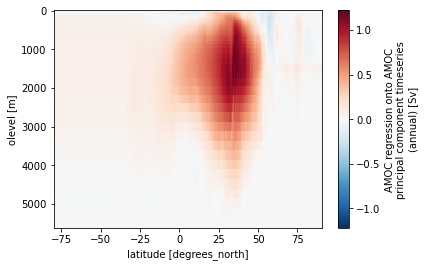

In [12]:
amoc_pattern_ann_a1.plot(yincrease = False)

(-30.0, 90.0)

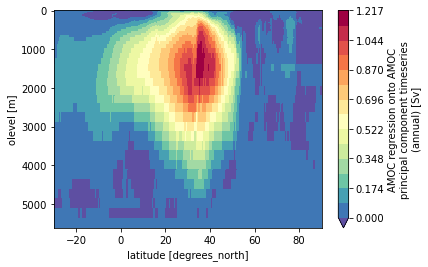

In [17]:
amoc_pattern_ann_a1.plot(yincrease = False, levels = 15, cmap = 'Spectral_r', vmin = 0)
ax = plt.gca()
ax.set_xlim([-30,90])

[Text(0, 0.5, 'depth [km]'), Text(0, 0.5, 'depth [km]')]

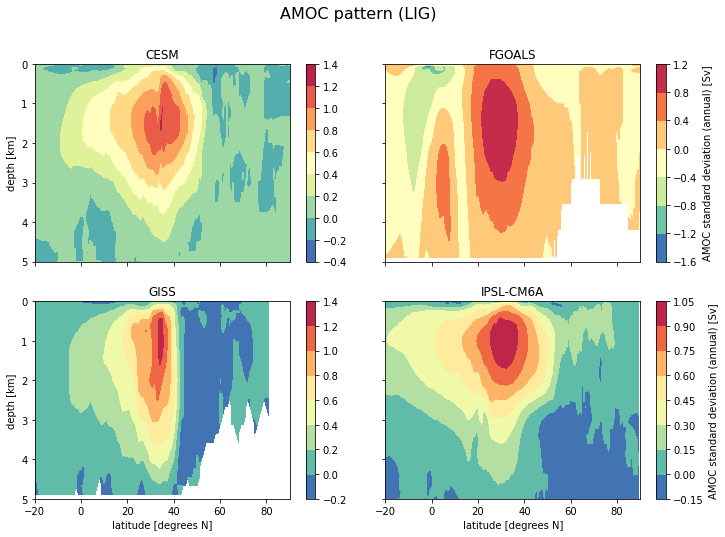

In [43]:
fig, axs = plt.subplots(2, 2, sharex = 'col', sharey = 'row', figsize = (12, 8), gridspec_kw = {'wspace':0.1})
(ax1, ax2), (ax3, ax4) = axs
fig.suptitle('AMOC pattern (LIG)', fontsize = 16)

cont1 = ax1.contourf(lat_amoc_a1, depth_a1, amoc_pattern_ann_a1, cmap = 'Spectral_r')
ax1.set_xlim(-20, 90)
ax1.set_ylim(0, 5000)
ax1.invert_yaxis()
ax1.set_title('CESM')

import matplotlib.ticker as ticker
y1 = depth_a1
scale_y1 = 1000
ticks_y1 = ticker.FuncFormatter(lambda y1, pos: '{0:g}'.format(y1/scale_y1))
ax1.yaxis.set_major_formatter(ticks_y1)

cont2 = ax2.contourf(lat_amoc_a2, depth_a2, amoc_pattern_ann_a2, cmap = 'Spectral_r')
ax2.set_xlim(-20, 90)
ax2.set_ylim(0, 5000)
ax2.invert_yaxis()
ax2.set_title('FGOALS')

y2 = depth_a2
scale_y2 = 1000
ticks_y2 = ticker.FuncFormatter(lambda y2, pos: '{0:g}'.format(y2/scale_y2))
ax2.yaxis.set_major_formatter(ticks_y2)

cont3 = ax3.contourf(lat_amoc_a3, depth_a3, amoc_pattern_ann_a3, cmap = 'Spectral_r')
ax3.set_xlim(-20, 90)
ax3.set_ylim(0, 5000)
ax3.invert_yaxis()
ax3.set_title('GISS')

y3 = depth_a3
scale_y3 = 1000
ticks_y3 = ticker.FuncFormatter(lambda y3, pos: '{0:g}'.format(y3/scale_y3))
ax3.yaxis.set_major_formatter(ticks_y3)

cont4 = ax4.contourf(lat_amoc_a4, depth_a4, amoc_pattern_ann_a4, cmap = 'Spectral_r')
ax4.set_xlim(-20, 90)
ax4.set_ylim(0, 5000)
ax4.invert_yaxis()
ax4.set_title('IPSL-CM6A')

y4 = depth_a4
scale_y4 = 1000
ticks_y4 = ticker.FuncFormatter(lambda y4, pos: '{0:g}'.format(y4/scale_y4))
ax4.yaxis.set_major_formatter(ticks_y4)

plt.colorbar(cont1, ax=ax1)
plt.colorbar(cont2, ax=ax2, label = 'AMOC standard deviation (annual) [Sv]')
plt.colorbar(cont3, ax=ax3)
plt.colorbar(cont4, ax=ax4, label = 'AMOC standard deviation (annual) [Sv]')

plt.setp(axs[-1, :], xlabel='latitude [degrees N]')
plt.setp(axs[:, 0], ylabel='depth [km]')

#plt.savefig('AMOC_pattern_LIG.png')

[Text(0, 0.5, 'depth [km]'), Text(0, 0.5, 'depth [km]')]

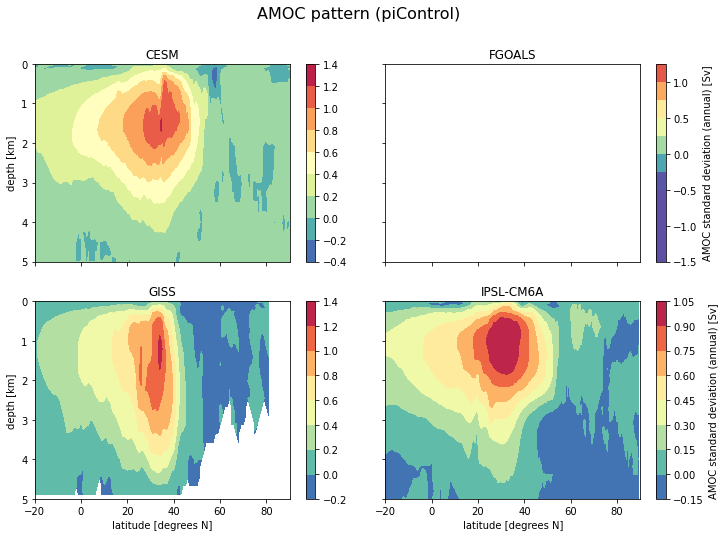

In [42]:
fig, axs = plt.subplots(2, 2, sharex = 'col', sharey = 'row', figsize = (12, 8), gridspec_kw = {'wspace':0.1})
(ax1, ax2), (ax3, ax4) = axs
fig.suptitle('AMOC pattern (piControl)', fontsize = 16)

cont1 = ax1.contourf(lat_amoc_b1, depth_b1, amoc_pattern_ann_b1, cmap = 'Spectral_r')
ax1.set_xlim(-20, 90)
ax1.set_ylim(0, 5000)
ax1.invert_yaxis()
ax1.set_title('CESM')

import matplotlib.ticker as ticker
y1 = depth_b1
scale_y1 = 1000
ticks_y1 = ticker.FuncFormatter(lambda y1, pos: '{0:g}'.format(y1/scale_y1))
ax1.yaxis.set_major_formatter(ticks_y1)

#cont2 = ax2.contourf(lat_amoc_b2, depth_b2, amoc_pattern_ann_b2, cmap = 'Spectral_r')
ax2.set_xlim(-20, 90)
ax2.set_ylim(0, 5000)
ax2.invert_yaxis()
ax2.set_title('FGOALS')

#y2 = depth_b2
#scale_y2 = 1000
#ticks_y2 = ticker.FuncFormatter(lambda y2, pos: '{0:g}'.format(y2/scale_y2))
#ax2.yaxis.set_major_formatter(ticks_y2)

cont3 = ax3.contourf(lat_amoc_b3, depth_b3, amoc_pattern_ann_b3, cmap = 'Spectral_r')
ax3.set_xlim(-20, 90)
ax3.set_ylim(0, 5000)
ax3.invert_yaxis()
ax3.set_title('GISS')

y3 = depth_b3
scale_y3 = 1000
ticks_y3 = ticker.FuncFormatter(lambda y3, pos: '{0:g}'.format(y3/scale_y3))
ax3.yaxis.set_major_formatter(ticks_y3)

cont4 = ax4.contourf(lat_amoc_b4, depth_b4, amoc_pattern_ann_b4, cmap = 'Spectral_r')
ax4.set_xlim(-20, 90)
ax4.set_ylim(0, 5000)
ax4.invert_yaxis()
ax4.set_title('IPSL-CM6A')

y4 = depth_b4
scale_y4 = 1000
ticks_y4 = ticker.FuncFormatter(lambda y4, pos: '{0:g}'.format(y4/scale_y4))
ax4.yaxis.set_major_formatter(ticks_y4)

plt.colorbar(cont1, ax=ax1)
plt.colorbar(cont2, ax=ax2, label = 'AMOC standard deviation (annual) [Sv]')
plt.colorbar(cont3, ax=ax3)
plt.colorbar(cont4, ax=ax4, label = 'AMOC standard deviation (annual) [Sv]')

plt.setp(axs[-1, :], xlabel='latitude [degrees N]')
plt.setp(axs[:, 0], ylabel='depth [km]')

#plt.savefig('AMOC_pattern_LIG.png')